In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [112]:
df = pd.read_csv("AAPL.csv",skiprows=[1])
df['Percentage every day'] = df['Close'].pct_change()
df['Volatility'] = df['High'] - df['Low']
df['Date'] = pd.to_datetime(df['Price'])
df['SMA30'] = df['Close'].rolling(window=30).mean()
df['Rolling Volatility'] = df['Close'].rolling(window=30).std()
df['Daily Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1
df= df.dropna()

In [181]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.drop(df[['Price','Date','day']],axis="columns")

,Adj Close,Close,High,Low,Open,Volume,Percentage every day,Volatility,SMA30,Rolling Volatility,Daily Return,Cumulative Return,month,year
29,78.925804,81.217499,81.555000,80.837502,81.047501,94747600,-0.007121,0.717499,78.647250,2.110613,-0.007121,0.081638,2,2020
30,78.945274,81.237503,81.495003,80.712502,81.184998,80113600,0.000246,0.782501,78.852250,2.050760,0.000246,0.081904,2,2020
31,77.499725,79.750000,79.937500,78.652496,78.839996,152531200,-0.018311,1.285004,79.032000,1.871720,-0.018311,0.062094,2,2020
32,78.622124,80.904999,81.142502,80.000000,80.000000,93984000,0.014483,1.142502,79.230500,1.734637,0.014483,0.077476,2,2020
33,77.815567,80.074997,81.162498,79.552498,80.657501,100566000,-0.010259,1.610001,79.413083,1.502967,-0.010259,0.066422,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,229.869995,229.869995,230.720001,228.059998,228.059998,38168300,0.005908,2.660004,228.942000,4.114591,0.005908,2.061362,11,2024
1233,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,0.013051,3.509995,228.994333,4.155398,0.013051,2.101315,11,2024
1234,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,0.009404,2.240005,229.034666,4.209671,0.009404,2.130481,11,2024
1235,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,-0.000553,1.880005,229.139666,4.318389,-0.000553,2.128750,11,2024


In [192]:

df_2020 = df[df["year"] == 2020]
grouping = df.groupby(['Open', 'month'])
grouping.first()

,,Price,Adj Close,Close,High,Low,Volume,Percentage every day,Volatility,Date,SMA30,Rolling Volatility,Daily Return,Cumulative Return,day,year
Open,month,,,,,,,,,,,,,,,
57.020000,3,2020-03-23,54.509754,56.092499,57.125000,53.152500,336752800,-0.021244,3.972500,2020-03-23,71.550249,7.745005,-0.021244,-0.252972,23,2020
59.090000,3,2020-03-24,59.978474,61.720001,61.922501,58.575001,287531200,0.100325,3.347500,2020-03-24,70.927999,7.760397,0.100325,-0.178026,24,2020
59.942501,3,2020-03-18,59.927448,61.667500,62.500000,59.279999,300233600,-0.024480,3.220001,2020-03-18,73.786083,6.656418,-0.024480,-0.178725,18,2020
60.084999,4,2020-04-02,59.504719,61.232498,61.287498,59.224998,165934000,0.016687,2.062500,2020-04-02,66.653750,6.026508,0.016687,-0.184518,2,2020
60.487499,3,2020-03-16,58.843922,60.552502,64.769997,60.000000,322423600,-0.128647,4.769997,2020-03-16,74.852583,5.984860,-0.128647,-0.193574,16,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.470001,11,2024-11-27,234.929993,234.929993,235.690002,233.809998,33498400,-0.000553,1.880005,2024-11-27,229.139666,4.318389,-0.000553,2.128750,27,2024
234.809998,11,2024-11-29,237.330002,237.330002,237.809998,233.970001,28481400,0.010216,3.839996,2024-11-29,229.312333,4.540739,0.010216,2.160712,29,2024
235.000000,7,2024-07-16,234.290741,234.820007,236.270004,232.330002,43234300,0.001792,3.940002,2024-07-16,214.024000,12.788222,0.001792,2.127285,16,2024


,Price,Adj Close,Close,High,Low,Open,Volume,Percentage every day,Volatility,Date,SMA30,Rolling Volatility,Daily Return,Cumulative Return,day,month,year
29,2020-02-13,78.925804,81.217499,81.555000,80.837502,81.047501,94747600,-0.007121,0.717499,2020-02-13,78.647250,2.110613,-0.007121,0.081638,13,2,2020
30,2020-02-14,78.945274,81.237503,81.495003,80.712502,81.184998,80113600,0.000246,0.782501,2020-02-14,78.852250,2.050760,0.000246,0.081904,14,2,2020
31,2020-02-18,77.499725,79.750000,79.937500,78.652496,78.839996,152531200,-0.018311,1.285004,2020-02-18,79.032000,1.871720,-0.018311,0.062094,18,2,2020
32,2020-02-19,78.622124,80.904999,81.142502,80.000000,80.000000,93984000,0.014483,1.142502,2020-02-19,79.230500,1.734637,0.014483,0.077476,19,2,2020
33,2020-02-20,77.815567,80.074997,81.162498,79.552498,80.657501,100566000,-0.010259,1.610001,2020-02-20,79.413083,1.502967,-0.010259,0.066422,20,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-12-24,129.047501,131.970001,133.460007,131.100006,131.320007,54930100,0.007712,2.360001,2020-12-24,122.509333,4.971875,0.007712,0.757550,24,12,2020
249,2020-12-28,133.663010,136.690002,137.339996,133.509995,133.990005,124486200,0.035766,3.830002,2020-12-28,123.092000,5.561218,0.035766,0.820410,28,12,2020
250,2020-12-29,131.883331,134.869995,138.789993,134.339996,138.050003,121047300,-0.013315,4.449997,2020-12-29,123.612333,5.909670,-0.013315,0.796171,29,12,2020
251,2020-12-30,130.758804,133.720001,135.990005,133.399994,135.580002,96452100,-0.008527,2.590012,2020-12-30,124.059666,6.153194,-0.008527,0.780856,30,12,2020


In [149]:
import plotly.express as px
df_2020 = df[df["year"] == 2020]
fig = px.bar(df_2020, x="month", y="Open", title="Open Price in 2020")
fig.update_xaxes(type="category")
fig.show()

In [155]:
df_2020 = df[df["year"] == 2021]
fig = px.bar(df_2020, x="month", y="Open", title="Open Price in 2021")
fig.update_xaxes(type="category")
fig.show()

In [156]:
df_2020 = df[df["year"] == 2022]
fig = px.bar(df_2020, x="month", y="Open", title="Open Price in 2022")
fig.update_xaxes(type="category")
fig.show()

In [157]:
df_2020 = df[df["year"] == 2023]
fig = px.bar(df_2020, x="month", y="Open", title="Open Price in 2023")
fig.update_xaxes(type="category")
fig.show()

In [159]:
df_2020 = df[df["year"] == 2024]
fig = px.bar(df_2020, x="month", y="Open", title="Open Price in 2024")
fig.update_xaxes(type="category")
fig.show()

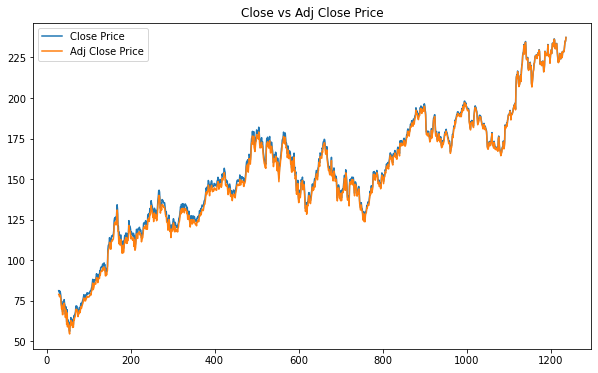

In [114]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Adj Close'], label='Adj Close Price')
plt.title('Close vs Adj Close Price')
plt.legend()
plt.show()


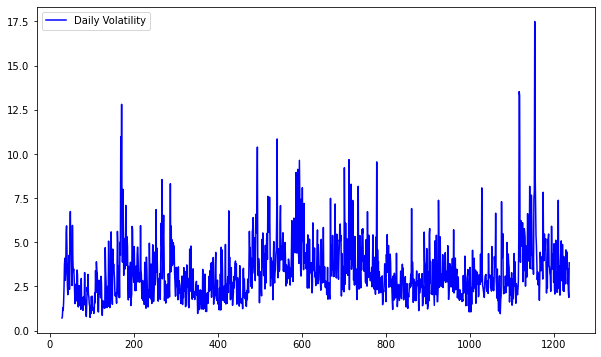

In [115]:
plt.figure(figsize=(10,6))
plt.plot(df['Volatility'],label='Daily Volatility', color='blue')
plt.legend()
plt.show()

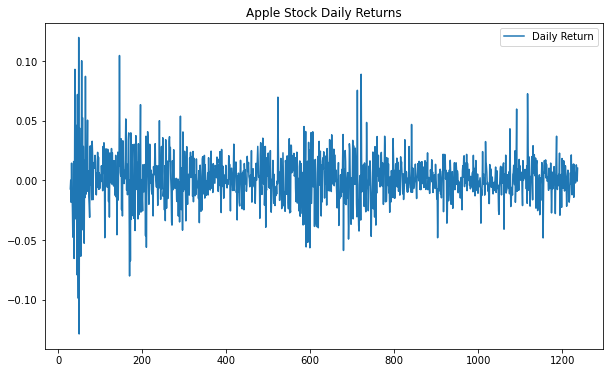

In [116]:

plt.figure(figsize=(10,6))
plt.plot(df['Percentage every day'], label='Daily Return')
plt.title('Apple Stock Daily Returns')
plt.legend()
plt.show()

In [117]:
correlation = df['Volume'].corr(df['Percentage every day'])
correlation

-0.010395885023137789

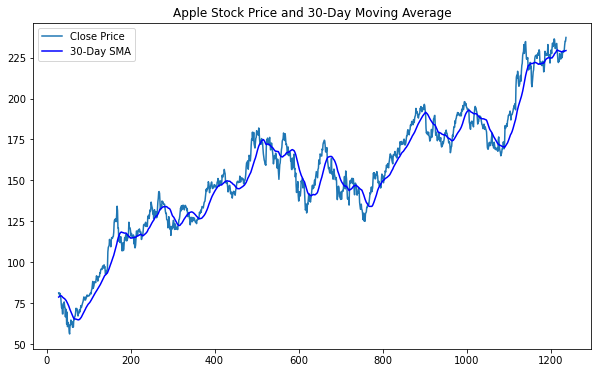

In [118]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA30'], label='30-Day SMA', color='blue')
plt.title('Apple Stock Price and 30-Day Moving Average')
plt.legend()
plt.show()

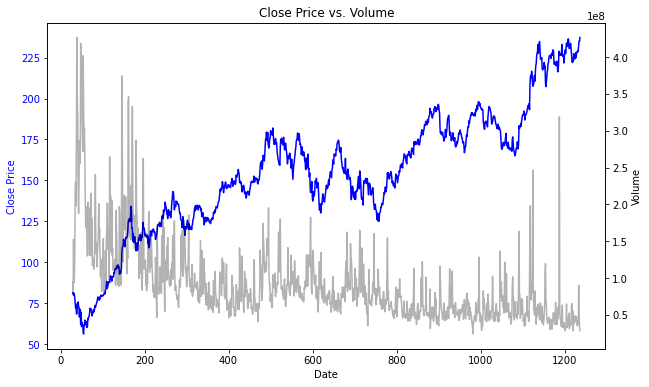

In [119]:
fig, fig2 = plt.subplots(figsize=(10, 6))
fig2.set_xlabel('Date')
fig2.set_ylabel('Close Price', color='blue')
fig2.plot(df['Close'], color='blue', label='Close Price')
fig2.tick_params(axis='y', labelcolor='blue')

fi = fig2.twinx()
fi.set_ylabel('Volume', color='black')
fi.plot(df['Volume'], color='black', label='Volume', alpha=0.3)
fi.tick_params(axis='y', labelcolor='black')

plt.title('Close Price vs. Volume')
plt.show()

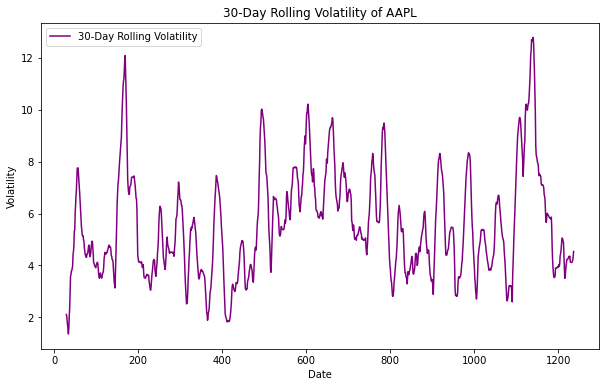

In [120]:

# Plot Rolling Volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Rolling Volatility'], label='30-Day Rolling Volatility', color='purple')
plt.title('30-Day Rolling Volatility of AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


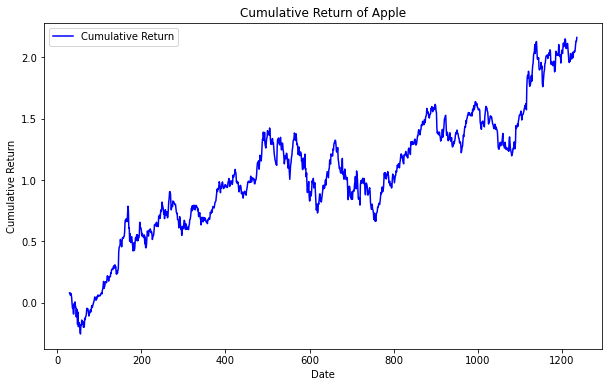

In [121]:
#calculate the growth factor for each day.


plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative Return'], label='Cumulative Return', color='Blue')
plt.title('Cumulative Return of Apple')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [122]:
import seaborn as sns

In [124]:
df.isna().sum()

Price                   0
Adj Close               0
Close                   0
High                    0
Low                     0
Open                    0
Volume                  0
Percentage every day    0
Volatility              0
Date                    0
SMA30                   0
Rolling Volatility      0
Daily Return            0
Cumulative Return       0
day                     0
month                   0
year                    0
dtype: int64

,Adj Close,Close,High,Low,Open,Volume,Percentage every day,Volatility,SMA30,Rolling Volatility,Daily Return,Cumulative Return,year
30,78.945274,81.237503,81.495003,80.712502,81.184998,80113600,0.000246,0.782501,78.852250,2.050760,0.000246,0.000246,2020
31,77.499725,79.750000,79.937500,78.652496,78.839996,152531200,-0.018311,1.285004,79.032000,1.871720,-0.018311,-0.018069,2020
32,78.622124,80.904999,81.142502,80.000000,80.000000,93984000,0.014483,1.142502,79.230500,1.734637,0.014483,-0.003848,2020
33,77.815567,80.074997,81.162498,79.552498,80.657501,100566000,-0.010259,1.610001,79.413083,1.502967,-0.010259,-0.014067,2020
34,76.054199,78.262497,80.112503,77.625000,79.654999,129554000,-0.022635,2.487503,79.495250,1.358971,-0.022635,-0.036384,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,229.869995,229.869995,230.720001,228.059998,228.059998,38168300,0.005908,2.660004,228.942000,4.114591,0.005908,1.830301,2024
1233,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,0.013051,3.509995,228.994333,4.155398,0.013051,1.867239,2024
1234,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,0.009404,2.240005,229.034666,4.209671,0.009404,1.894204,2024
1235,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,-0.000553,1.880005,229.139666,4.318389,-0.000553,1.892603,2024


In [ ]:
sns.barplot(df['year'])